In [118]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [119]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [120]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

### 1.К алгоритму kNN, представленному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.

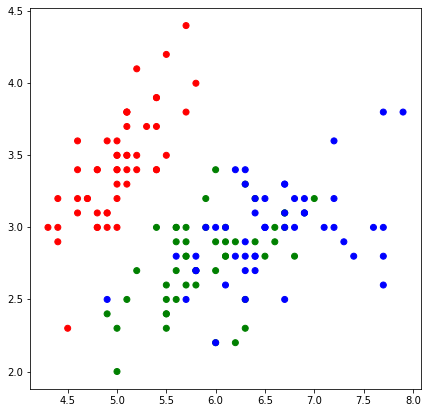

In [121]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

In [122]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
      
    return np.sqrt(distance)

In [123]:
# Реализуем алгоритм поиска k ближайших соседей.
def knn(x_train, y_train, x_test, k, choice='dist'):
    
    answers = []
    for x in x_test:
        weights_ = []
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
           
            # 1 / (i + a) ** b
            #a = 1
            #b = 2
            # определяется всегда один класс
            #weight = 1 / (i + 1)
            
            #  1 / (d + a) ** b
            a = 1
            b = 2
            weight = 1 / (distance + a) ** b
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки и вес объекта
            test_distances.append((distance, y_train[i]))
            weights_.append((weight, y_train[i]))
            
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        if choice == 'dist':
            # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
            for d in sorted(test_distances)[0:k]:
                classes[d[1]] += 1
        elif choice == 'w':
            for d in sorted(weights_)[-k:-1]:
                classes[d[1]] += 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

In [124]:
# Напишем функцию для вычисления точности
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [131]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    plt.figure(figsize=(14,6))
    
    plt.subplot(121)
    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, 'dist')

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(['red','green', 'blue']))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('График построен и оценен с помощью distance')
    
    plt.subplot(122)
    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, 'w')

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(['red','green', 'blue']))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("График построен и оценен с помощью weight")
    plt.show()
    


In [132]:
k = 5
y_pred = knn(X_train, y_train, X_test, k, 'w')
print(f'Точность алгоритма при k = {i}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.767


Точность алгоритма при k = 1 distance: 0.667
Точность алгоритма при k = 1 weight: 0.200


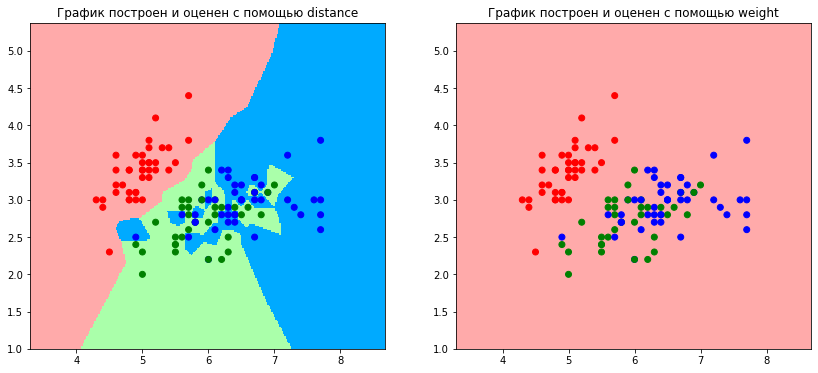

Точность алгоритма при k = 3 distance: 0.733
Точность алгоритма при k = 3 weight: 0.667


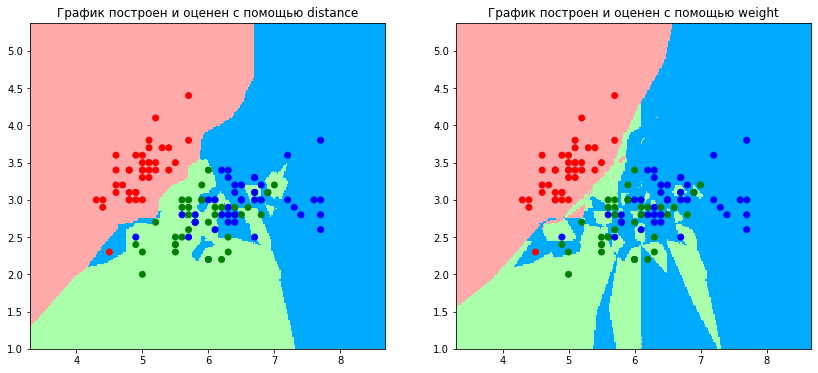

Точность алгоритма при k = 5 distance: 0.867
Точность алгоритма при k = 5 weight: 0.767


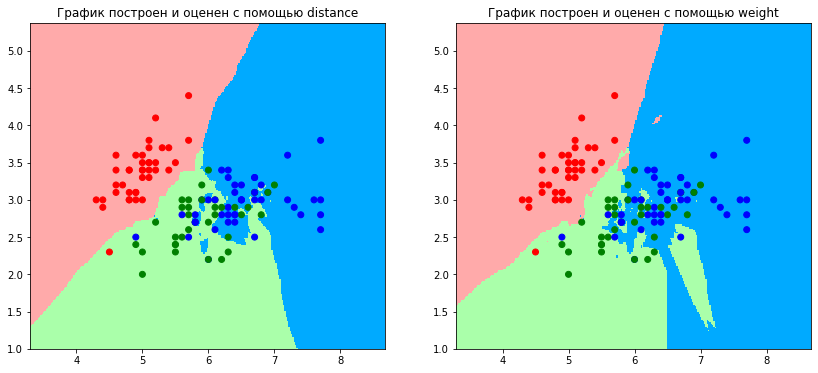

Точность алгоритма при k = 10 distance: 0.833
Точность алгоритма при k = 10 weight: 0.833


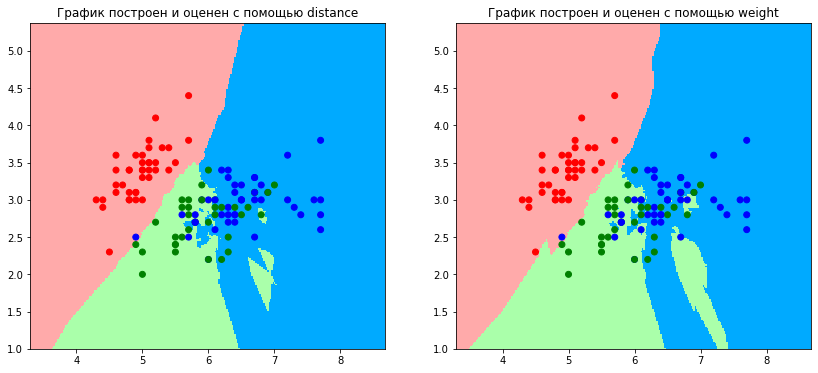

In [133]:
k = [1, 3, 5, 10]

for i in k:
    y_pred = knn(X_train, y_train, X_test, i, 'dist')
    print(f'Точность алгоритма при k = {i} distance: {accuracy(y_pred, y_test):.3f}')
    y_pred_w = knn(X_train, y_train, X_test, i, 'w')
    print(f'Точность алгоритма при k = {i} weight: {accuracy(y_pred_w, y_test):.3f}')
    get_graph(X_train, y_train, i)

Качество модели с увеличением кластеров растет и выходит при k = 10 на равный уровень.Так же можно отметить что гипер плоскости различаются.

### 2(*) Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из этого урока (создать датасет, как в методичке).